## AJUSTE THREADS CPU

C:\Users\aileo\AppData\Local\Temp\ipykernel_22912\842965047.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None, names=["fused_gates", "native_time", "system_time"], skiprows=1)
C:\Users\aileo\AppData\Local\Temp\ipykernel_22912\842965047.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None, names=["fused_gates", "native_time", "system_time"], skiprows=1)
C:\Users\aileo\AppData\Local\Temp\ipykernel_22912\842965047.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None, names=["fused_gates", "native_time", "system_

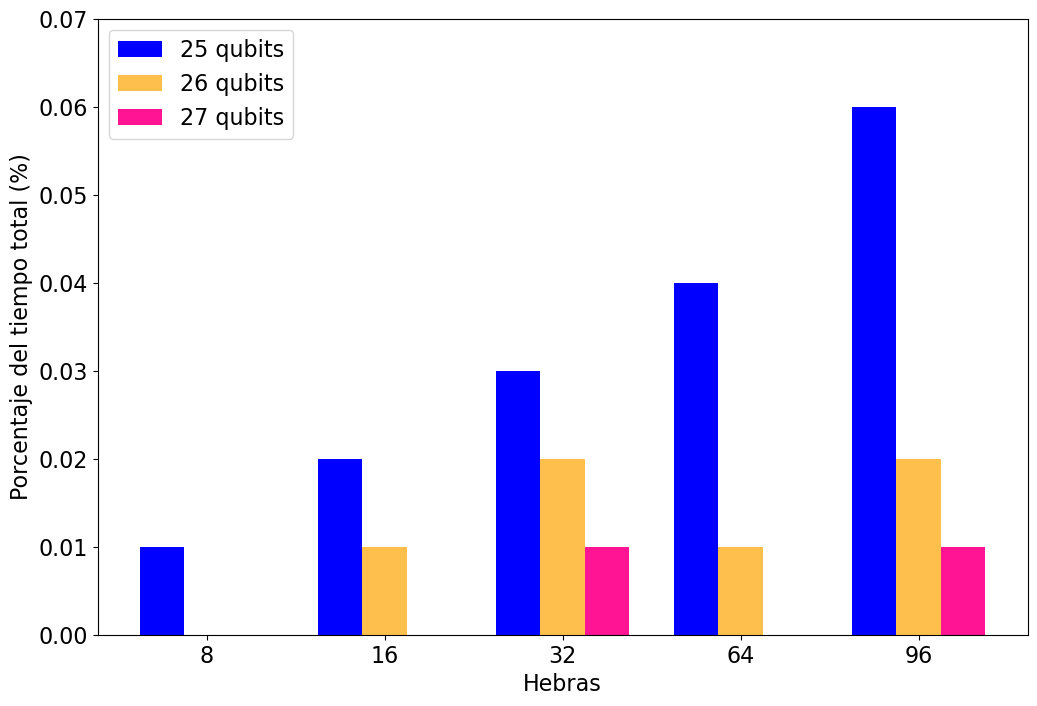

In [46]:
#codigo para hacer histograma con la diferencia de tiempos de los threads
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Función para leer los datos de un archivo y devolver un DataFrame, ignorando la primera fila
def load_data(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None, names=["fused_gates", "native_time", "system_time"], skiprows=1)

# Función para limpiar datos y manejar valores NaN
def clean_data(df):
    df = df.dropna(subset=['fused_gates', 'native_time', 'system_time'])
    df['fused_gates'] = df['fused_gates'].astype(int)
    df['native_time'] = df['native_time'].astype(float)
    df['system_time'] = df['system_time'].astype(float)
    return df

# Cargar los datos de los cuatro archivos
file1 = 'tiempos/threads/NS_25.txt'
file2 = 'tiempos/threads/NS_26.txt'
file3 = 'tiempos/threads/NS_27.txt'

data1 = clean_data(load_data(file1))
data2 = clean_data(load_data(file2))
data3 = clean_data(load_data(file3))

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Definir las posiciones de las barras
bar_width = 0.25
positions = np.arange(len(data1))
positions1 = positions - bar_width 
positions2 = positions 
positions3 = positions + bar_width

# Graficar las barras apiladas para cada caso
p1_system = plt.bar(positions1, data1['system_time'], width=bar_width, label='25 qubits', color='blue')


# Graficar las barras apiladas para el segundo caso
p2_system = plt.bar(positions2, data2['system_time'], width=bar_width, label='26 qubits', color='orange', alpha=0.7)

# Graficar las barras apiladas para el segundo caso
p3_system = plt.bar(positions3, data3['system_time'], width=bar_width, label='27 qubits', color='DeepPink', alpha=1)


# Añadir etiquetas y leyenda
plt.xlabel('Hebras', fontsize=16)
plt.ylabel('Porcentaje del tiempo total (%)', fontsize=16)
#plt.title('Histograma Acumulativo de Tiempos para n=20 y d=0.7n', fontsize=15)
plt.xticks(positions, data1['fused_gates'], fontsize=16)  # Ajustar las posiciones de las etiquetas del eje x
plt.yticks(fontsize=16)



#ajusto el rango de los ejes
plt.ylim(0, 0.07)




# Crear leyenda personalizada para patrones de textura

plt.legend(fontsize=16)





plt.savefig('tiempos/threads/threadsNS_qubits.png')
plt.show()


C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\1499477145.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(threads, cpu_20, yerr=error_20, fmt=color[0][0]+markerG[iterxo],
C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\1499477145.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(threads, cpu_25, yerr=error_25, fmt=color[0][0]+markerG[iterxo],
C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\1499477145.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(threads, cpu_26, yerr=error_26, fmt=color[0][0]+markerG[iterxo],
C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\1499477145.py:49: UserWarning: colo

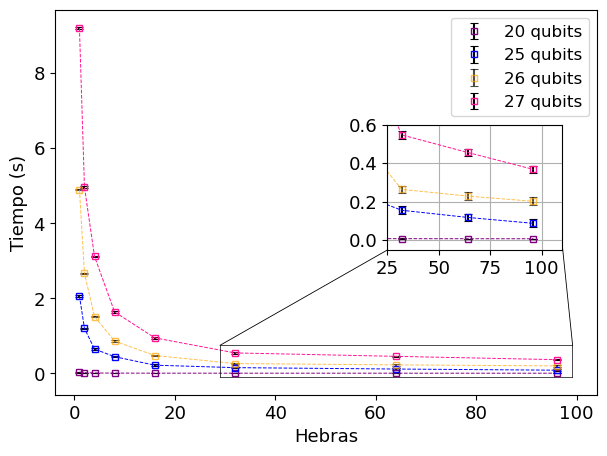

In [72]:
#codigo para hacer un plot uniendo los puntos de los datos de un archivo,
#se debe correr en la carpeta donde se encuentran los archivos de datos
import numpy as np
import matplotlib.pyplot as plt

#importo una libreria para indicar el valor de threads de los puntos en el gráfico
from matplotlib.ticker import MaxNLocator


#leo el archivo de datos de texto en 'tiempos/threads/cpu.txt' y guardo los datos en un dataframe
#la primera columna threads es el eje x, las columnas 2,4,6 son los datos de 25, 26 y 27 qubits respectivamente y las columnas 3,5,7 son los datos de error del eje y

data = np.loadtxt('tiempos/threads/cpu.txt')
threads = data[:,0]
cpu_25 = data[:,1]
cpu_26 = data[:,3]
cpu_27 = data[:,5]
cpu_20=data[:,7]
error_25 = data[:,2]
error_26 = data[:,4]
error_27 = data[:,6]
error_20=data[:,8]

color=["black","r","m","g"]
markerG=["x","o","s","X"]
iterxo=2
#grafico los datos
plt.errorbar(threads, cpu_20, yerr=error_20, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8, label='20 qubits', color='purple', alpha=1)
plt.errorbar(threads, cpu_25, yerr=error_25, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8, label='25 qubits', color='blue', alpha=1)
plt.errorbar(threads, cpu_26, yerr=error_26, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8, label='26 qubits',color='orange', alpha=0.7)
plt.errorbar(threads, cpu_27, yerr=error_27, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8, label='27 qubits', color='DeepPink', alpha=1)



#uno los puntos con lineas
plt.plot(threads, cpu_25, linestyle='--', linewidth=0.7,color='blue', alpha=1)
plt.plot(threads, cpu_26, linestyle='--', linewidth=0.7,color='orange', alpha=0.7)
plt.plot(threads, cpu_27, linestyle='--', linewidth=0.7,color='DeepPink', alpha=1)
plt.plot(threads, cpu_20, linestyle='--',linewidth=0.7, color='purple', alpha=1)




#el eje y es hasta 10
#plt.ylim(0, 10)
#hago la grafica más ancha
plt.gcf().set_size_inches(7, 5)

#eje y con escala logaritmica en base 2
#plt.xscale('log', base=2)
#plt.yscale('log', base=2)

#pongo la letra mas grande
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#letras label mas grandes
plt.xlabel('Hebras', fontsize=13)
plt.ylabel('Tiempo (s)', fontsize=13)
plt.legend(fontsize=12)

"""
#hago un ajuste de los datos para cada n qubits y grafico la recta de ajuste
#para 25 qubits
p = np.polyfit(np.log2(threads[:5]), np.log2(cpu_25[:5]), 1)
plt.plot(threads, 2**np.polyval(p, np.log2(threads)), linestyle='-', color='blue', alpha=1)
#para 26 qubits
q = np.polyfit(np.log2(threads[:6]), np.log2(cpu_26[:6]), 1)
plt.plot(threads, 2**np.polyval(q, np.log2(threads)), linestyle='-', color='orange', alpha=0.7)
#para 27 qubits
r = np.polyfit(np.log2(threads[:6]), np.log2(cpu_27[:6]), 1)
plt.plot(threads, 2**np.polyval(r, np.log2(threads)), linestyle='-', color='DeepPink', alpha=1)

#guardo en un archivo los resultados de los ajustes anteriores
with open('tiempos/threads/ajustes.txt', 'w') as f:
    f.write('Ajustes de los datos de tiempo de ejecución en función de las hebras para 25, 26 y 27 qubits\n\n')
    f.write('Para 25 qubits:\n')
    f.write('log2(t) = {:.2f} * log2(hebras) + {:.2f}\n\n'.format(p[0], p[1]))
    f.write('Para 26 qubits:\n')
    f.write('log2(t) = {:.2f} * log2(hebras) + {:.2f}\n\n'.format(q[0], q[1]))
    f.write('Para 27 qubits:\n')
    f.write('log2(t) = {:.2f} * log2(hebras) + {:.2f}\n\n'.format(r[0], r[1]))
"""

#dibujo un cuadrado de las mismas dimensiones que el zoom con el mismo grosor de linea
plt.plot([29, 29], [-0.1, 0.75], color='black', linestyle='-', linewidth=0.5)
plt.plot([29, 99], [0.75, 0.75], color='black', linestyle='-', linewidth=0.5)
plt.plot([99, 99], [0.75, -0.1], color='black', linestyle='-', linewidth=0.5)
plt.plot([99, 29], [-0.1, -0.1], color='black', linestyle='-', linewidth=0.5)

#dibujo una recta inclinada para indicar que se hace un zoom
plt.plot([29, 63], [0.75, 3.34], color='black', linestyle='-', linewidth=0.6)
plt.plot([99.2, 97.2], [0.75, 3.34], color='black', linestyle='-', linewidth=0.6)

#hago un zoom en la zona donde se encuentran los tres ultimos puntos de cada curva
plt.axes([0.6, 0.4, 0.25, 0.25])
plt.errorbar(threads, cpu_25, yerr=error_25, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8, label='25 qubits', color='blue', alpha=1)
plt.errorbar(threads, cpu_26, yerr=error_26, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8, label='26 qubits',color='orange', alpha=0.7)
plt.errorbar(threads, cpu_27, yerr=error_27, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8, label='27 qubits',color='DeepPink', alpha=1)
plt.errorbar(threads, cpu_20, yerr=error_20, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8, label='20 qubits', color='purple', alpha=1)
plt.plot(threads, cpu_25, linestyle='--', linewidth=0.7,color='blue')
plt.plot(threads, cpu_26, linestyle='--', linewidth=0.7,color='orange', alpha=0.7)
plt.plot(threads, cpu_27, linestyle='--', linewidth=0.7,color='DeepPink', alpha=1)
plt.plot(threads, cpu_20, linestyle='--', linewidth=0.7,color='purple', alpha=1)
plt.ylim(-0.05, 0.6)
plt.xlim(25, 110)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

#eje y con escala logaritmica en base 2
#plt.xscale('log', base=2)
plt.gcf().set_size_inches(7, 5)

#plt.savefig('tiempos/threads/threads_cpu_logdoble.png')



plt.grid()
plt.savefig('tiempos/threads/cpu.png')
plt.show()





C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\2710532648.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(threads, cpu_20, yerr=error_20, fmt=color[0][0]+markerG[iterxo],
C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\2710532648.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(threads, cpu_25, yerr=error_25, fmt=color[0][0]+markerG[iterxo],
C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\2710532648.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(threads, cpu_26, yerr=error_26, fmt=color[0][0]+markerG[iterxo],
C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\2710532648.py:49: UserWarning: colo

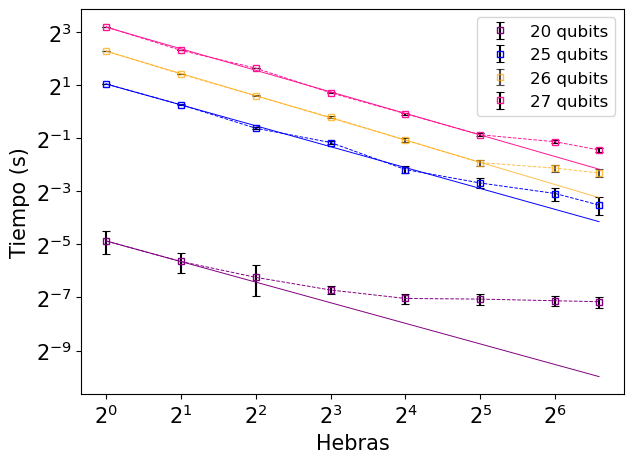

In [70]:
#codigo para hacer un plot uniendo los puntos de los datos de un archivo,
#se debe correr en la carpeta donde se encuentran los archivos de datos
import numpy as np
import matplotlib.pyplot as plt

#importo una libreria para indicar el valor de threads de los puntos en el gráfico
from matplotlib.ticker import MaxNLocator


#leo el archivo de datos de texto en 'tiempos/threads/cpu.txt' y guardo los datos en un dataframe
#la primera columna threads es el eje x, las columnas 2,4,6 son los datos de 25, 26 y 27 qubits respectivamente y las columnas 3,5,7 son los datos de error del eje y

data = np.loadtxt('tiempos/threads/cpu.txt')
threads = data[:,0]
cpu_25 = data[:,1]
cpu_26 = data[:,3]
cpu_27 = data[:,5]
cpu_20=data[:,7]
error_25 = data[:,2]
error_26 = data[:,4]
error_27 = data[:,6]
error_20=data[:,8]

color=["black","r","m","g"]
markerG=["x","o","s","X"]
iterxo=2
#grafico los datos
plt.errorbar(threads, cpu_20, yerr=error_20, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8, label='20 qubits', color='purple', alpha=1)
plt.errorbar(threads, cpu_25, yerr=error_25, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8, label='25 qubits', color='blue', alpha=1)
plt.errorbar(threads, cpu_26, yerr=error_26, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8, label='26 qubits',color='orange', alpha=0.7)
plt.errorbar(threads, cpu_27, yerr=error_27, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8, label='27 qubits', color='DeepPink', alpha=1)



#uno los puntos con lineas
plt.plot(threads, cpu_25, linestyle='--',linewidth=0.7, color='blue', alpha=1)
plt.plot(threads, cpu_26, linestyle='--',linewidth=0.7, color='orange', alpha=0.7)
plt.plot(threads, cpu_27, linestyle='--', linewidth=0.7,color='DeepPink', alpha=1)
plt.plot(threads, cpu_20, linestyle='--', linewidth=0.7,color='purple', alpha=1)




#el eje y es hasta 10
#plt.ylim(0, 10)
#hago la grafica más ancha
plt.gcf().set_size_inches(7, 5)

#eje y con escala logaritmica en base 2
plt.xscale('log', base=2)
plt.yscale('log', base=2)

#pongo la letra mas grande
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#letras label mas grandes
plt.xlabel('Hebras', fontsize=15)
plt.ylabel('Tiempo (s)', fontsize=15)
plt.legend(fontsize=12)


#hago un ajuste de los datos para cada n qubits y grafico la recta de ajuste
#para 25 qubits
p = np.polyfit(np.log2(threads[:5]), np.log2(cpu_25[:5]), 1)
plt.plot(threads, 2**np.polyval(p, np.log2(threads)), linestyle='-',linewidth=0.7, color='blue', alpha=1)
#para 26 qubits
q = np.polyfit(np.log2(threads[:6]), np.log2(cpu_26[:6]), 1)
plt.plot(threads, 2**np.polyval(q, np.log2(threads)), linestyle='-',linewidth=0.7, color='orange', alpha=0.7)
#para 27 qubits
r = np.polyfit(np.log2(threads[:6]), np.log2(cpu_27[:6]), 1)
plt.plot(threads, 2**np.polyval(r, np.log2(threads)), linestyle='-',linewidth=0.7, color='DeepPink', alpha=1)
#para 20 qubits
s = np.polyfit(np.log2(threads[:2]), np.log2(cpu_20[:2]), 1)
plt.plot(threads, 2**np.polyval(s, np.log2(threads)), linestyle='-',linewidth=0.7, color='purple', alpha=1)


#guardo en un archivo los resultados de los ajustes anteriores
with open('tiempos/threads/ajustes.txt', 'w') as f:
    f.write('Ajustes de los datos de tiempo de ejecución en función de las hebras para 25, 26 y 27 qubits\n\n')
    f.write('Para 25 qubits:\n')
    f.write('log2(t) = {:.2f} * log2(hebras) + {:.2f}\n\n'.format(p[0], p[1]))
    f.write('Para 26 qubits:\n')
    f.write('log2(t) = {:.2f} * log2(hebras) + {:.2f}\n\n'.format(q[0], q[1]))
    f.write('Para 27 qubits:\n')
    f.write('log2(t) = {:.2f} * log2(hebras) + {:.2f}\n\n'.format(r[0], r[1]))
    f.write('Para 20 qubits:\n')
    f.write('log2(t) = {:.2f} * log2(hebras) + {:.2f}\n\n'.format(s[0], s[1]))
            


#eje y con escala logaritmica en base 2
#plt.xscale('log', base=2)
plt.gcf().set_size_inches(7, 5)

plt.savefig('tiempos/threads/threads_cpu_logdoble.png')

plt.show()





## AJUSTE MEMORIA CPU

C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\1332838168.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(qubits, memoria, yerr=error, fmt=color[0][0]+markerG[iterxo],


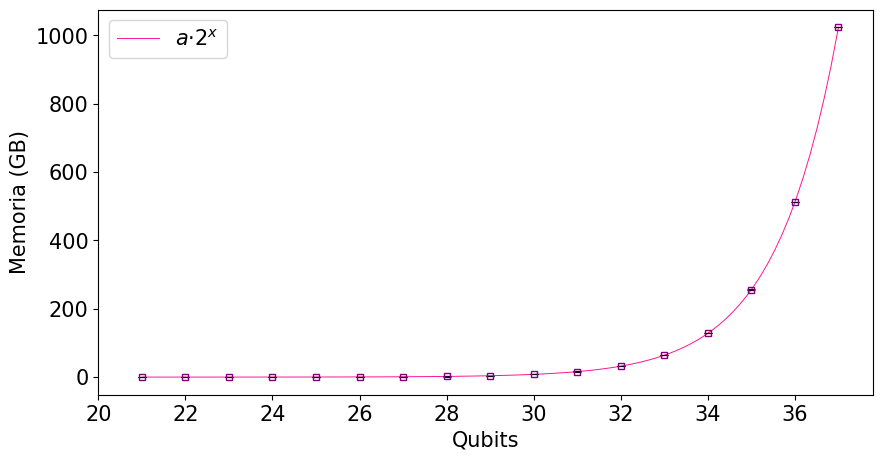

In [292]:
#codigo para hacer un plot y un ajuste de los datos a una funcion exponencial
#se debe correr en la carpeta donde se encuentran los archivos de datos
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#leo el archivo de datos de texto 
#la primera columna es el eje x, la segunda columna es el eje y y la tercera columna es el error del eje y
data = np.loadtxt('memoria/memoria_qubits.txt')
qubits = data[1:,0]
memoria = data[1:,1]
error = data[1:,2]



#importo libreria para hacer un ajuste exponencial en base 2
def func(x):
    return  2**(x)*8/1024/1024/1024




#grafico el ajuste para 100 valores de x
x = np.linspace(21, 37, 100)
plt.plot(x, func(x), label='$a·2^{x}$', color='deeppink', alpha=1, linewidth=0.7)


color=["black","r","m","g"]
markerG=["x","o","s","X"]
iterxo=2
#plot de los puntos
plt.errorbar(qubits, memoria, yerr=error, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=5,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.8,color='purple', alpha=1)



#hago la grafica más ancha
plt.gcf().set_size_inches(10, 5)

#pongo el intervalo del eje x de 1 en 1 qubit
plt.xticks(np.arange(20, 38, 2))

#pongo la letra mas grande
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#letras label mas grandes
plt.xlabel('Qubits', fontsize=15)
plt.ylabel('Memoria (GB)', fontsize=15)
plt.legend(fontsize=15)


plt.savefig('memoria/memoria_qubits.png')
plt.show()



## AJUSTE fused gates 20 qubits



C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\2096514861.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None, names=["fused_gates", "native_time", "python_time", "system_time", "error"], skiprows=1)
C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\2096514861.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None, names=["fused_gates", "native_time", "python_time", "system_time", "error"], skiprows=1)


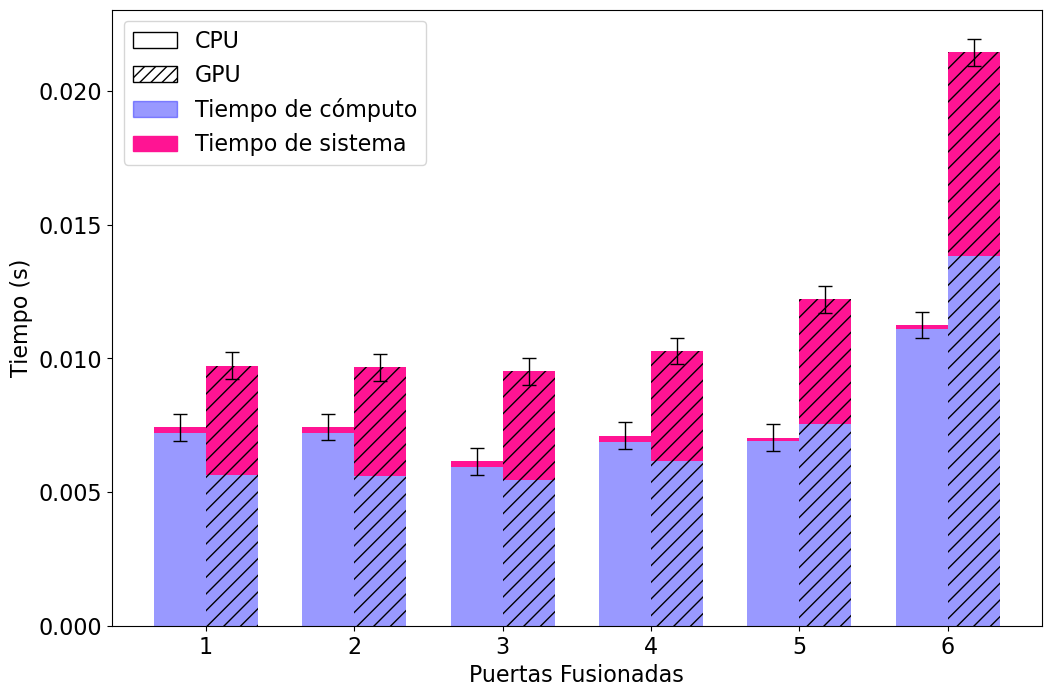

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Función para leer los datos de un archivo y devolver un DataFrame, ignorando la primera fila
def load_data(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None, names=["fused_gates", "native_time", "python_time", "system_time", "error"], skiprows=1)

# Función para limpiar datos y manejar valores NaN
def clean_data(df):
    df = df.dropna(subset=['fused_gates', 'native_time', 'python_time', 'system_time', 'error'])
    df['fused_gates'] = df['fused_gates'].astype(int)
    df['native_time'] = df['native_time'].astype(float)
    df['python_time'] = df['python_time'].astype(float)
    df['system_time'] = df['system_time'].astype(float)
    df['error'] = df['error'].astype(float)
    return df

# Cargar los datos de los cuatro archivos
file1 = 'tiempos/fusedgates/cpu_qubits20.txt'
file3 = 'tiempos/fusedgates/gpu_qubits20.txt'

data1 = clean_data(load_data(file1))
data2 = clean_data(load_data(file3))

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Definir las posiciones de las barras
bar_width = 0.35
positions = np.arange(len(data1))
positions1 = positions - bar_width / 2
positions2 = positions + bar_width / 2

# Graficar las barras apiladas para cada caso
p1_native = plt.bar(positions1, data1['native_time'], width=bar_width, label='Tiempo nativo', color='blue', alpha=0.4)
p1_python = plt.bar(positions1, data1['python_time'], width=bar_width, bottom=data1['native_time'], label='Tiempo python', color='blue', alpha=0.4)
p1_system = plt.bar(positions1, data1['system_time'], width=bar_width, bottom=data1['native_time'] + data1['python_time'], label='Tiempo Sistema', color='DeepPink', alpha=1)

# Graficar las barras apiladas para el segundo caso
p2_native = plt.bar(positions2, data2['native_time'], width=bar_width, label='Caso 2 - Nativo', color='blue', alpha=0.4, hatch='//')
p2_python = plt.bar(positions2, data2['python_time'], width=bar_width, bottom=data2['native_time'], label='Caso 2 - Python', color='blue', alpha=0.4, hatch='//')
p2_system = plt.bar(positions2, data2['system_time'], width=bar_width, bottom=data2['native_time'] + data2['python_time'], label='Caso 2 - Sistema', color='DeepPink', alpha=1, hatch='//')

# Agregar barras de error
plt.errorbar(positions1, data1['native_time'] + data1['python_time'] + data1['system_time'], yerr=data1['error'], fmt='none', ecolor='black', elinewidth=1, capsize=5)
plt.errorbar(positions2, data2['native_time'] + data2['python_time'] + data2['system_time'], yerr=data2['error'], fmt='none', ecolor='black', elinewidth=1, capsize=5)

# Añadir etiquetas y leyenda
plt.xlabel('Puertas Fusionadas', fontsize=16)
plt.ylabel('Tiempo (s)', fontsize=16)
#plt.title('Histograma Acumulativo de Tiempos para n=20 y d=0.7n', fontsize=15)
plt.xticks(positions, data1['fused_gates'], fontsize=16)  # Ajustar las posiciones de las etiquetas del eje x
plt.yticks(fontsize=16)

# Crear leyenda personalizada para patrones de textura
cpu_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='CPU')
gpu_patch = mpatches.Patch(facecolor='white', edgecolor='black', hatch='///', label='GPU')

plt.legend(handles=[cpu_patch, gpu_patch, 
                    mpatches.Patch(color='blue', alpha=0.4, label='Tiempo de cómputo'),
                    mpatches.Patch(color='DeepPink', alpha=1, label='Tiempo de sistema'),],
                   bbox_to_anchor=(0.35, 1), fontsize=16)





plt.savefig('tiempos/fusedgates/cpu_gpu_qubits20.png')
plt.show()


## AJUSTE fused gates 30 qubits



C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\4176305990.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None, names=["fused_gates", "native_time", "python_time", "system_time", "error"], skiprows=1)
C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\4176305990.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None, names=["fused_gates", "native_time", "python_time", "system_time", "error"], skiprows=1)


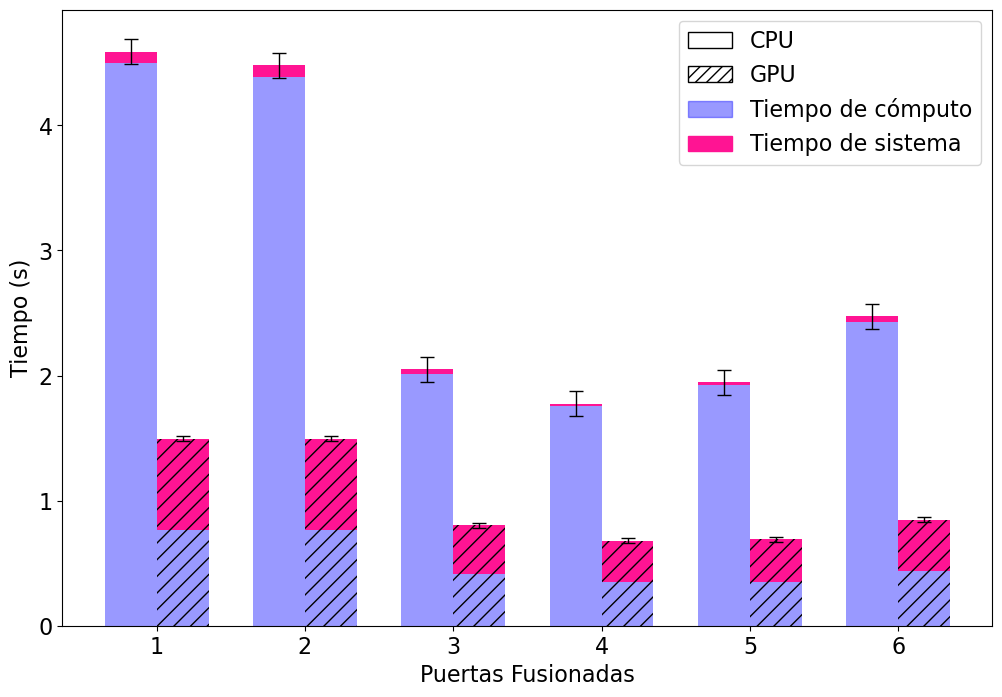

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Función para leer los datos de un archivo y devolver un DataFrame, ignorando la primera fila
def load_data(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None, names=["fused_gates", "native_time", "python_time", "system_time", "error"], skiprows=1)

# Función para limpiar datos y manejar valores NaN
def clean_data(df):
    df = df.dropna(subset=['fused_gates', 'native_time', 'python_time', 'system_time', 'error'])
    df['fused_gates'] = df['fused_gates'].astype(int)
    df['native_time'] = df['native_time'].astype(float)
    df['python_time'] = df['python_time'].astype(float)
    df['system_time'] = df['system_time'].astype(float)
    df['error'] = df['error'].astype(float)
    return df

# Cargar los datos de los cuatro archivos
file1 = 'tiempos/fusedgates/cpu_qubits30.txt'
file3 = 'tiempos/fusedgates/gpu_qubits30.txt'

data1 = clean_data(load_data(file1))
data2 = clean_data(load_data(file3))

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Definir las posiciones de las barras
bar_width = 0.35
positions = np.arange(len(data1))
positions1 = positions - bar_width / 2
positions2 = positions + bar_width / 2

# Graficar las barras apiladas para cada caso
p1_native = plt.bar(positions1, data1['native_time'], width=bar_width, label='Tiempo nativo', color='blue', alpha=0.4)
p1_python = plt.bar(positions1, data1['python_time'], width=bar_width, bottom=data1['native_time'], label='Tiempo python', color='blue', alpha=0.4)
p1_system = plt.bar(positions1, data1['system_time'], width=bar_width, bottom=data1['native_time'] + data1['python_time'], label='Tiempo Sistema', color='DeepPink', alpha=1)

# Graficar las barras apiladas para el segundo caso
p2_native = plt.bar(positions2, data2['native_time'], width=bar_width, label='Caso 2 - Nativo', color='blue', alpha=0.4, hatch='//')
p2_python = plt.bar(positions2, data2['python_time'], width=bar_width, bottom=data2['native_time'], label='Caso 2 - Python', color='blue', alpha=0.4, hatch='//')
p2_system = plt.bar(positions2, data2['system_time'], width=bar_width, bottom=data2['native_time'] + data2['python_time'], label='Caso 2 - Sistema', color='DeepPink', alpha=1, hatch='//')

# Agregar barras de error
plt.errorbar(positions1, data1['native_time'] + data1['python_time'] + data1['system_time'], yerr=data1['error'], fmt='none', ecolor='black', elinewidth=1, capsize=5)
plt.errorbar(positions2, data2['native_time'] + data2['python_time'] + data2['system_time'], yerr=data2['error'], fmt='none', ecolor='black', elinewidth=1, capsize=5)

# Añadir etiquetas y leyenda
plt.xlabel('Puertas Fusionadas', fontsize=16)
plt.ylabel('Tiempo (s)', fontsize=16)
#plt.title('Histograma Acumulativo de Tiempos para n=30 y d=0.7n', fontsize=15)
plt.xticks(positions, data1['fused_gates'], fontsize=16)  # Ajustar las posiciones de las etiquetas del eje x
plt.yticks(fontsize=16)


# Crear leyenda personalizada para patrones de textura
cpu_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='CPU')
gpu_patch = mpatches.Patch(facecolor='white', edgecolor='black', hatch='///', label='GPU')


plt.legend(handles=[cpu_patch, gpu_patch, 
                    mpatches.Patch(color='blue', alpha=0.4, label='Tiempo de cómputo'),
                    mpatches.Patch(color='DeepPink', alpha=1, label='Tiempo de sistema'),],
                    bbox_to_anchor=(1, 1), fontsize=16)




plt.savefig('tiempos/fusedgates/cpu_gpu_qubits30.png')
plt.show()


## Ajuste qubits CPU-GPU


C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\1643536269.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(qubits, cpu_tiempo, yerr=cpu_error, fmt=color[0][0]+markerG[iterxo],
C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\1643536269.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ms" (-> color='m'). The keyword argument will take precedence.
  plt.errorbar(qubits[:14], gpu_tiempo, yerr=gpu_error, linestyle='--', fmt=color[iterxo][0]+markerG[iterxo],


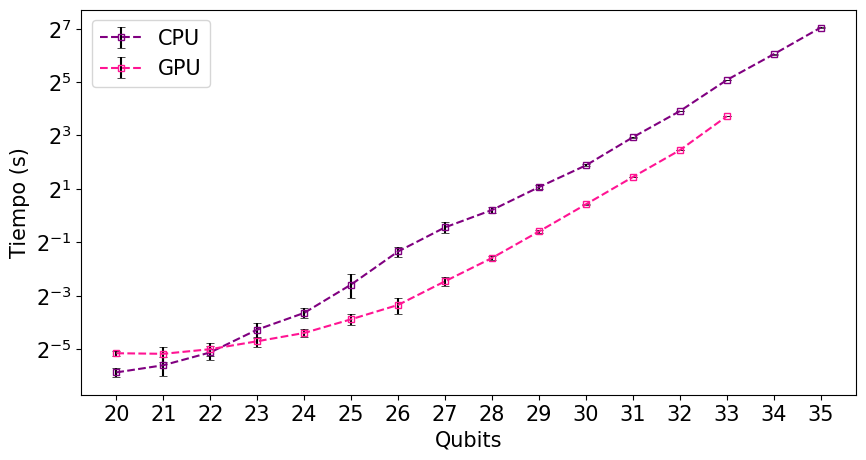

In [214]:
#codigo para hacer un plot de unos datos de un archivo
#se debe correr en la carpeta donde se encuentran los archivos de datos
import numpy as np
import matplotlib.pyplot as plt

data1= np.loadtxt('tiempos/qubits/qubits_cpu.txt')
data2= np.loadtxt('tiempos/qubits/qubits_gpu.txt')
qubits = data1[:,0]
cpu_tiempo = data1[:,1]
cpu_error = data1[:,2]
gpu_tiempo = data2[:,1]
gpu_error=data2[:,2]

color=["black","r","m","g"]
markerG=["x","o","s","X"]
iterxo=2
#grafico los datos
plt.errorbar(qubits, cpu_tiempo, yerr=cpu_error, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=4,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.5, label='CPU', color='purple', alpha=1, linestyle='--')
plt.errorbar(qubits[:14], gpu_tiempo, yerr=gpu_error, linestyle='--', fmt=color[iterxo][0]+markerG[iterxo],
    fillstyle='none',
    ms=4,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.5, label='GPU', color='Deeppink', alpha=1)

#hago un ajuste de los datos para la cpu y grafico la recta de ajuste
p = np.polyfit(qubits[9:], np.log2(cpu_tiempo[9:]), 1)
#plt.plot(qubits, 2**np.polyval(p, qubits), linestyle='-',linewidth=0.7, color='blue', alpha=1)

#hago un ajuste de los datos para la gpu y grafico la recta de ajuste
r = np.polyfit(qubits[6:14], np.log2(gpu_tiempo[6:]), 1)
#plt.plot(qubits, 2**np.polyval(r, qubits), linestyle='-',linewidth=0.7, color='blue', alpha=1)

#hago la grafica más ancha
plt.gcf().set_size_inches(10, 5)

#eje y con escala logaritmica en base 2
plt.yscale('log', base=2)

#pongo la letra mas grande
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#guardo en un archivo los resultados de los ajustes anteriores
with open('tiempos/qubits/ajustes.txt', 'w') as f:
    f.write('Ajustes de los datos de tiempo de ejecución en función de los qubits para la CPU y GPU\n\n')
    f.write('Para la CPU:\n')
    f.write('log2(t) = {:.2f} * qubits + {:.2f}\n\n'.format(p[0], p[1]))
    f.write('Para la GPU:\n')
    f.write('log2(t) = {:.2f} * qubits + {:.2f}\n\n'.format(r[0], r[1]))
            
#pongo los xtics de 1 en 1
plt.xticks(np.arange(20, 35.1, 1))

#letras label mas grandes
plt.xlabel('Qubits', fontsize=15)
plt.ylabel('Tiempo (s)', fontsize=15)
plt.legend(fontsize=15)

plt.savefig('tiempos/qubits/cpu_gpu_tiempos.png')


## 

## Gráfica depth cpu-gpu


C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\3948075872.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(depths1, cpu_tiempo, yerr=cpu_error, linestyle='--', fmt=color[iterxo][0]+markerG[iterxo],
C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\3948075872.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(depths2, gpu_tiempo, yerr=gpu_error, linestyle='--', fmt=color[iterxo][0]+markerG[iterxo],


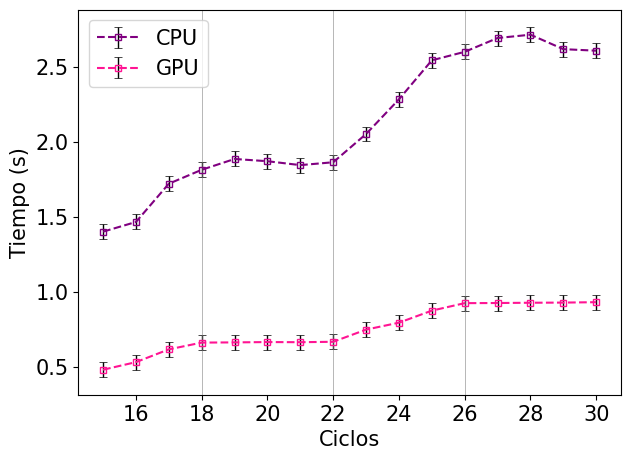

In [85]:
#codigo para hacer un plot de unos datos de un archivo
#se debe correr en la carpeta donde se encuentran los archivos de datos
import numpy as np
import matplotlib.pyplot as plt

data1= np.loadtxt('tiempos/depths/cpu_depths_30qubits.txt')
data2= np.loadtxt('tiempos/depths/gpu_depths_30qubits.txt')
depths1 = data1[:,0]
cpu_tiempo = data1[:,1]
cpu_error = data1[:,2]
depths2 = data2[:,0]
gpu_tiempo = data2[:,1]
gpu_error=data2[:,2]

color=["b","r","black","g"]
markerG=["x","o","s","X"]
iterxo=2
#grafico los datos
plt.errorbar(depths1, cpu_tiempo, yerr=cpu_error, linestyle='--', fmt=color[iterxo][0]+markerG[iterxo],
    fillstyle='none',
    ms=4,
    ecolor=color[iterxo],
    elinewidth=1,
    capsize=3,
    capthick=0.5, label='CPU', color='purple', alpha=1)
plt.errorbar(depths2, gpu_tiempo, yerr=gpu_error, linestyle='--', fmt=color[iterxo][0]+markerG[iterxo],
    fillstyle='none',
    ms=4,
    ecolor=color[iterxo],
    elinewidth=1,
    capsize=3,
    capthick=0.5, label='GPU', color='Deeppink', alpha=1)


#hago la grafica más ancha
plt.gcf().set_size_inches(7, 5)

#dibujo una linea vertical discontinua en los puntos 18, 22, 26
plt.axvline(x=18, color='grey', linestyle='-', linewidth=0.4)
plt.axvline(x=22, color='grey', linestyle='-', linewidth=0.4)
plt.axvline(x=26, color='grey', linestyle='-', linewidth=0.4)


#pongo la letra mas grande
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#pongo los xtics de 1 en 1
plt.yticks(np.arange(0.5, 3, 0.5))
#pongo la leyenda arriba a la izquierda
plt.legend(loc='upper left', fontsize=15)
#letras label mas grandes
plt.xlabel('Ciclos', fontsize=15)
plt.ylabel('Tiempo (s)', fontsize=15)


plt.savefig('tiempos/depths/cpu_gpu_depths.png')

## Compración experimental qsim-qsimh


C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\622646720.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(qubits1, cpu_tiempo, yerr=cpu_error, fmt=color[0][0]+markerG[iterxo],
C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\622646720.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ms" (-> color='m'). The keyword argument will take precedence.
  plt.errorbar(qubits3, gpu_tiempo, yerr=gpu_error, linestyle='', fmt=color[iterxo][0]+markerG[iterxo],
C:\Users\aileo\AppData\Local\Temp\ipykernel_21600\622646720.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ms" (-> color='m'). The keyword argument will take precedence.
  plt.errorbar(qubits2, qsimh, yerr=qsimh_error, linestyle='', fmt=color[iterxo][0]+markerG[iterxo],


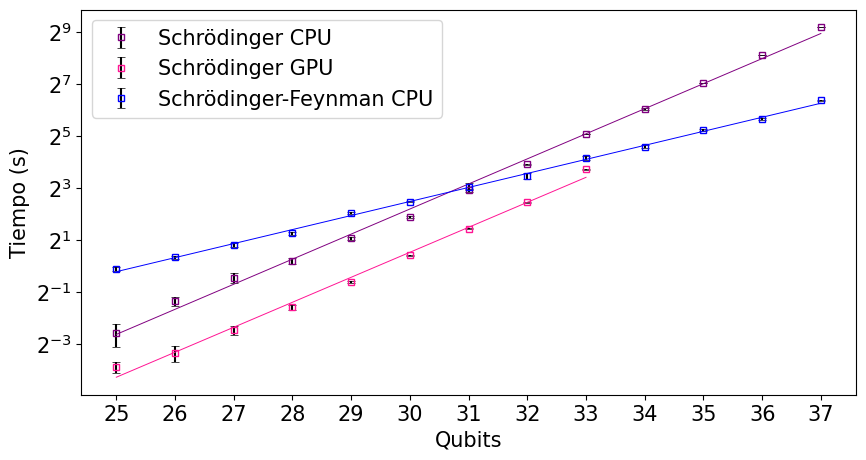

In [387]:
#codigo para hacer un plot de unos datos de un archivo
#se debe correr en la carpeta donde se encuentran los archivos de datos
import numpy as np
import matplotlib.pyplot as plt

data1= np.loadtxt('tiempos/qubits/qubits_cpu.txt')
data2= np.loadtxt('tiempos/qsimh/qsimh.txt')
data3= np.loadtxt('tiempos/qubits/qubits_gpu.txt')
qubits1 = data1[5:,0]
cpu_tiempo = data1[5:,1]
cpu_error = data1[5:,2]
qubits2 = data2[:,0]
qsimh = data2[:,1]
qsimh_error=data2[:,2]
gpu_tiempo = data3[5:,1]
gpu_error=data3[5:,2]
qubits3 = data3[5:,0]


color=["black","r","m","g"]
markerG=["x","o","s","X"]
iterxo=2
#grafico los datos
plt.errorbar(qubits1, cpu_tiempo, yerr=cpu_error, fmt=color[0][0]+markerG[iterxo],
    fillstyle='none',
    ms=4,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.5, label='Schrödinger CPU', color='purple', alpha=1, linestyle='')
plt.errorbar(qubits3, gpu_tiempo, yerr=gpu_error, linestyle='', fmt=color[iterxo][0]+markerG[iterxo],
    fillstyle='none',
    ms=4,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.5, label='Schrödinger GPU', color='Deeppink', alpha=1)
plt.errorbar(qubits2, qsimh, yerr=qsimh_error, linestyle='', fmt=color[iterxo][0]+markerG[iterxo],
    fillstyle='none',
    ms=4,
    ecolor=color[0],
    elinewidth=1.5,
    capsize=3,
    capthick=0.5, label='Schrödinger-Feynman CPU', color='blue', alpha=1)


#hago un ajuste de los datos para la cpu y grafico la recta de ajuste
p = np.polyfit(qubits1, np.log2(cpu_tiempo), 1)
plt.plot(qubits1, 2**np.polyval(p, qubits1), linestyle='-',linewidth=0.7, color='purple', alpha=1)

#hago un ajuste de los datos para la gpu y grafico la recta de ajuste
r = np.polyfit(qubits3, np.log2(gpu_tiempo), 1)
plt.plot(qubits3, 2**np.polyval(r, qubits3), linestyle='-',linewidth=0.7, color='Deeppink', alpha=1)

#hago un ajuste de los datos para la qsimh y grafico la recta de ajuste
s = np.polyfit(qubits2, np.log2(qsimh), 1)
plt.plot(qubits2, 2**np.polyval(s, qubits2), linestyle='-',linewidth=0.7, color='blue', alpha=1)

#importo una libreria para calcular el error de la pendiente de la recta de ajuste
from scipy.stats import linregress

#calculo el error de la pendiente de la recta de ajuste para la cpu
slope, intercept, r_value, p_value, std_err = linregress(qubits1, np.log2(cpu_tiempo))
error_cpu = std_err

#calculo el error de la pendiente de la recta de ajuste para la gpu
slope, intercept, r_value, p_value, std_err = linregress(qubits3, np.log2(gpu_tiempo))
error_gpu = std_err

#calculo el error de la pendiente de la recta de ajuste para la qsimh
slope, intercept, r_value, p_value, std_err = linregress(qubits2, np.log2(qsimh))
error_qsimh = std_err


#hago la grafica más ancha
plt.gcf().set_size_inches(10, 5)

#eje y con escala logaritmica en base 2
plt.yscale('log', base=2)

#pongo la letra mas grande
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#guardo en un archivo los resultados de los ajustes anteriores y el error de los ajustes
with open('tiempos/qsimh/ajustes.txt', 'w') as f:
    f.write('Ajustes de los datos de tiempo de ejecución en función de los qubits para la CPU y GPU\n\n')
    f.write('Para la CPU:\n')
    f.write('log2(t) = {:.2f} * qubits + {:.2f}\n\n'.format(p[0], p[1]))
    f.write('Error = {:.2f}\n\n'.format(error_cpu))
    f.write('Para la GPU:\n')
    f.write('log2(t) = {:.2f} * qubits + {:.2f}\n\n'.format(r[0], r[1]))
    f.write('Error = {:.2f}\n\n'.format(error_gpu))
    f.write('Para la CPU con qsimh:\n')
    f.write('log2(t) = {:.2f} * qubits + {:.2f}\n\n'.format(s[0], s[1]))
    f.write('Error = {:.2f}\n\n'.format(error_qsimh))
    
#pongo los xtics de 1 en 1
plt.xticks(np.arange(25, 38, 1))

#letras label mas grandes
plt.xlabel('Qubits', fontsize=15)
plt.ylabel('Tiempo (s)', fontsize=15)
plt.legend(fontsize=15)

plt.savefig('tiempos/qsimh/qsimh_tiempos.png')


## comparacion teorica qsim/qsimh


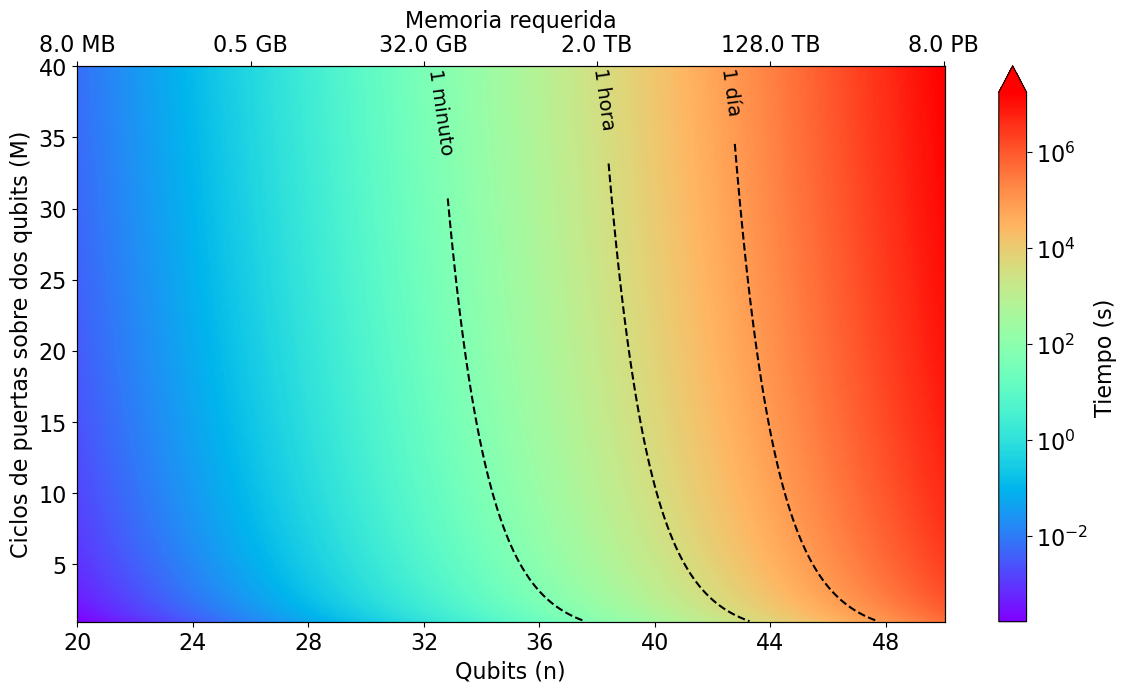

In [400]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Parámetros
n_qubits = np.linspace(20, 50, 500)
m_cycles = np.linspace(1, 40, 500)
N_cores =64 # Número de núcleos del supercomputador
constant_memory = 8 # Ajustar esta constante según sea necesario

# Crear una malla para n_qubits y m_cycles
N, M = np.meshgrid(n_qubits, m_cycles)
#N_cores=4 if N < 22 else 8 if N < 24 else 16 if N < 26 else 32 if N < 29 else 64 if N < 32 else 96


# Calcular el tiempo en segundos
time_seconds = M *((N)/2)* (2 ** ((N))) / N_cores*10**(-9)#ciclos con doble gate

# Calcular la memoria en GB
memory_gb = 2 ** n_qubits * constant_memory / (1024 ** 3)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 4))

# Crear un gradiente de colores
norm = mcolors.LogNorm(vmin=time_seconds.min(), vmax=time_seconds.max())
cmap = plt.get_cmap('rainbow')
pcm = ax.pcolormesh(N, M, time_seconds, norm=norm, cmap=cmap, shading='auto')

# Añadir una barra de color
cbar = fig.colorbar(pcm, ax=ax, extend='max')
cbar.set_label('Tiempo (s)', fontsize=16)
#aumento el tamaño de la letra de la barra de color
cbar.ax.tick_params(labelsize=16)

# Contornos para diferentes tiempos
levels = [60, 3600, 86400, 3.154e7, 3.154e8, 3.154e9, 3.154e10]
contours = ax.contour(N, M, time_seconds, levels=levels, colors='black', linestyles='dashed')
#pongo las etiquetas de los contornos una a una, personalizadas con texto en minutos, horas, dias, años
ax.clabel(contours, inline=True, fontsize=14, fmt=lambda x: f'{x/60:.0f} minuto' 
          if x < 3600 else f'{x/3600:.0f} hora' 
          if x < 86400 else f'{x/86400:.0f} día' 
          if x < 3.154e7 else f'{x/3.154e7:.0f} año' 
          if x < 3.154e8 else f'{x/3.154e7:.0f} años' 
          if x < 3.154e9 else f'{x/3.154e7:.0f} años' 
          if x < 3.154e10 else f'{x/3.154e7:.0f} años')

#pongo los valores del eje x en enteros
plt.xticks(np.arange(20, 51, 4), fontsize=16)
plt.yticks( fontsize=16)

# Crear un segundo eje x para la memoria
ax_memory = ax.twiny()
ax_memory.set_xlim(ax.get_xlim())
ax_memory.set_xticks(np.linspace(n_qubits.min(), n_qubits.max(), num=6))
ax_memory.set_xticklabels([f'{2**int(n)* constant_memory / (1024 ** 2) } MB' 
                           if n < 26 else f'{2**int(n)* constant_memory / (1024 ** 3) } GB'
                           if n < 36 else f'{2**int(n)* constant_memory / (1024 ** 4) } TB'
                            if n < 46 else f'{2**int(n)* constant_memory / (1024 ** 5) } PB'
                            if n < 56 else f'{2**int(n)* constant_memory / (1024 ** 6) } EB'
                           for n in np.linspace(n_qubits.min(), n_qubits.max(), num=6)], fontsize=16)
ax_memory.set_xlabel('Memoria requerida', fontsize=16)

#hago que la label de los contornos mo este tan pegada al eje x superior
plt.subplots_adjust(top=1.5)

#separo el titulo de memoria requerida del grafico y del titulo

# Añadir etiquetas y título
ax.set_xlabel('Qubits (n)', fontsize=16)
ax.set_ylabel('Ciclos de puertas sobre dos qubits (M)', fontsize=16)
#ax.set_title('Algortimo de Schrödinger', fontsize=16)

# Mostrar la gráfica
plt.show()

# Guardar la gráfica
fig.savefig('tiempos/qsimh/schrodinger.png', bbox_inches='tight')


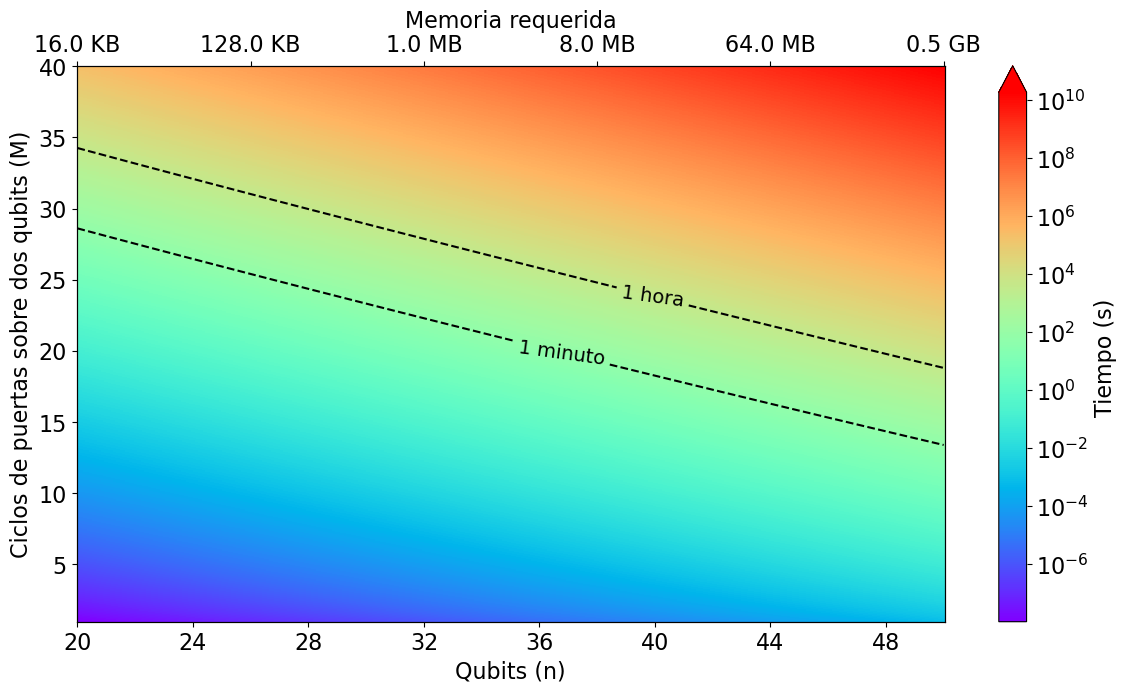

In [401]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


# Parámetros
n_qubits = np.linspace(20, 50, 500)
m_cycles = np.linspace(1, 40, 500)
N_cores =2 # Número de núcleos del supercomputador
constant_memory = 8 # Ajustar esta constante según sea necesario

# Crear una malla para n_qubits y m_cycles
N, M = np.meshgrid(n_qubits, m_cycles)
#N_cores=4 if N < 22 else 8 if N < 24 else 16 if N < 26 else 32 if N < 29 else 64 if N < 32 else 96


# Calcular el tiempo en segundos
time_seconds = M *(N)/4*2* 2**(N/2)*4**(M/2) / N_cores*10**(-12) #ciclos con doble gate

# Calcular la memoria en GB
memory_gb = 2 ** (n_qubits/2) * constant_memory / (1024 ** 3)

# Crear la figura y los ejes
fig, ax = plt.subplots(1,figsize=(14, 4))

# Crear un gradiente de colores
norm = mcolors.LogNorm(vmin=time_seconds.min(), vmax=time_seconds.max())
cmap = plt.get_cmap('rainbow')
pcm = ax.pcolormesh(N, M, time_seconds, norm=norm, cmap=cmap, shading='auto')

# Añadir una barra de color
cbar = fig.colorbar(pcm, ax=ax, extend='max')
cbar.set_label('Tiempo (s)', fontsize=16)
#aumento el tamaño de la letra de la barra de color
cbar.ax.tick_params(labelsize=16)

# Contornos para diferentes tiempos
levels = [60, 3600]
contours = ax.contour(N, M, time_seconds, levels=levels, colors='black', linestyles='dashed')
#pongo las etiquetas de los contornos una a una, personalizadas con texto en minutos, horas, dias, años
ax.clabel(contours, inline=True, fontsize=14, fmt=lambda x: f'{x/60:.0f} minuto' 
          if x < 3600 else f'{x/3600:.0f} hora' 
          if x < 86400 else f'{x/86400:.0f} día' 
          if x < 3.154e7 else f'{x/3.154e7:.0f} año' 
          if x < 3.154e8 else f'{x/3.154e7:.0f} años' 
       )

#bajo los label de los contornos
plt.subplots_adjust(top=1.5)

#pongo los valores del eje x en enteros
plt.xticks(np.arange(20, 51, 4), fontsize=16)
plt.yticks( fontsize=16)

# Crear un segundo eje x para la memoria
ax_memory = ax.twiny()
ax_memory.set_xlim(ax.get_xlim())
ax_memory.set_xticks(np.linspace(n_qubits.min(), n_qubits.max(), num=6))
ax_memory.set_xticklabels([f'{2**int(n/2+1)* constant_memory / (1024 ** 1) } KB' 
                           if n < 32 else f'{2**int(n/2+1)* constant_memory / (1024 ** 2) } MB'
                           if n < 48 else f'{2**int(n/2+1)* constant_memory / (1024 ** 3) } GB'
                            if n < 80 else f'{2**int(n/2+1)* constant_memory / (1024 ** 5) } PB'
                          
                           for n in np.linspace(n_qubits.min(), n_qubits.max(), num=6)], fontsize=16)
ax_memory.set_xlabel('Memoria requerida', fontsize=16)






# Añadir etiquetas y título
ax.set_xlabel('Qubits (n)', fontsize=16)
ax.set_ylabel('Ciclos de puertas sobre dos qubits (M)', fontsize=16)
#ax.set_title('Algortimo de Schrödinger-Feynman')


# Guardar la gráfica
fig.savefig('tiempos/qsimh/schrodinger_feynman.png',  bbox_inches='tight')

# Mostrar la gráfica
plt.show()




In [ ]:
#pongo las dos ultimas graficas juntas una al lado de la otra para comparar
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
